In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import datasets

In [2]:
# Getting data
def load_data():
    data = datasets.load_iris()
    return data

# Creating function for getting plots
def get_figure(x, y, color):

    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.scatter(x, y, s=100, c = color, cmap="prism", edgecolor="black")

    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    return fig, ax


iris = load_data()

X = iris.data[:, :2] #sepal length, sepal width
y = iris.target

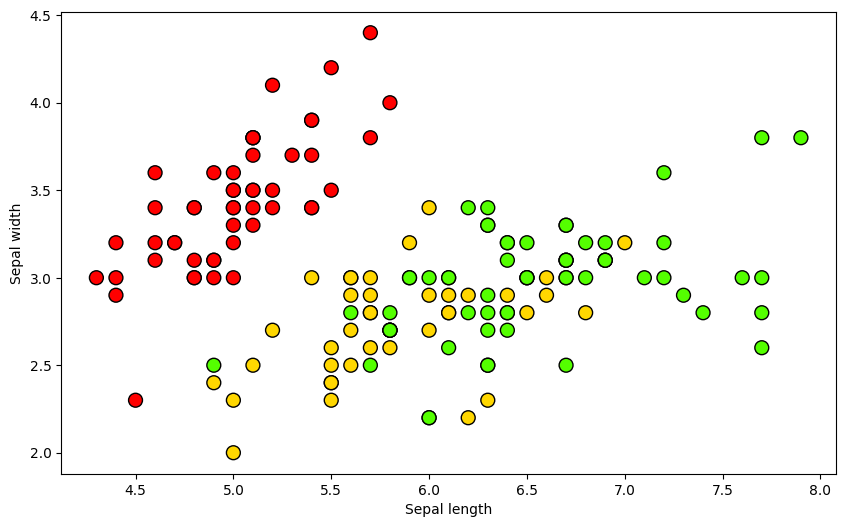

In [3]:
fig, ax = get_figure(X[:,0], X[:,1], color=y)

# kNN

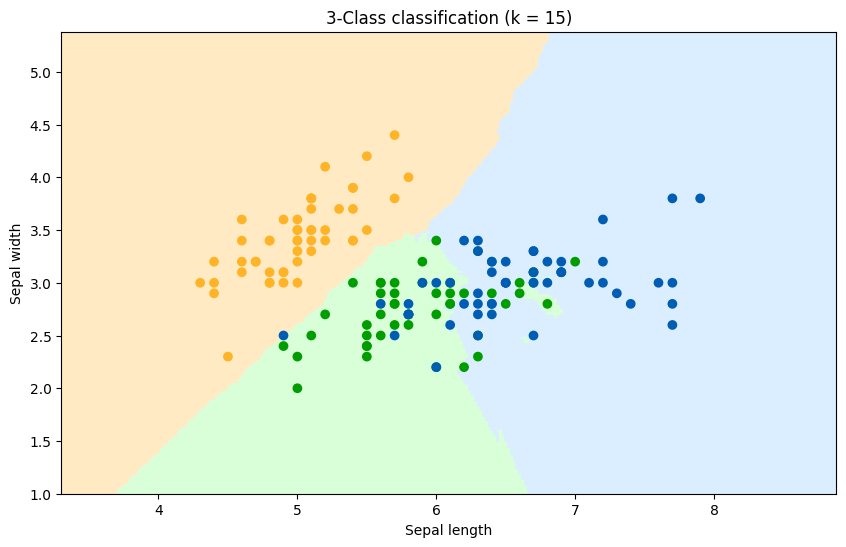

In [4]:
h = .02
n_neighbours = 15

# Create color maps
cmap_light = ListedColormap(['#ffeac4', '#d8ffd8','#dbeeff'])
cmap_bold = ListedColormap(['#ffb327', '#009d00','#005db4'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors=n_neighbours)
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = get_figure(X[:,0], X[:,1], color = y)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = {n_neighbours})")
plt.show()

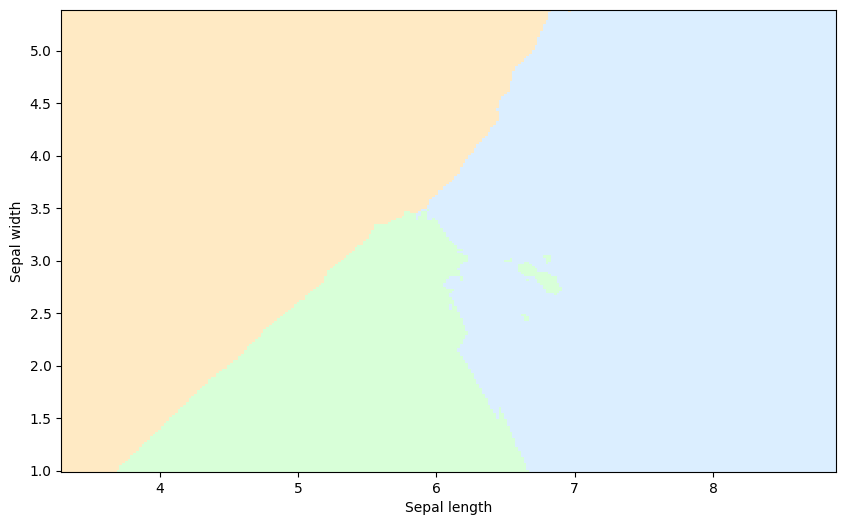

In [5]:
fig, ax = get_figure(X[:,0], X[:,1], color = y)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [6]:
a = 1
test = {0: '^', 1: '.'}.get(a, '+')

print(test)

.


In [7]:
[{0: '^', 1: '.'}.get(i, '+') for i in y] # Very cool way to create a nested list with 3 elements

['^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+',
 '+']

# Finding optimal k

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

Text(0, 0.5, 'Mean Absolute Error')

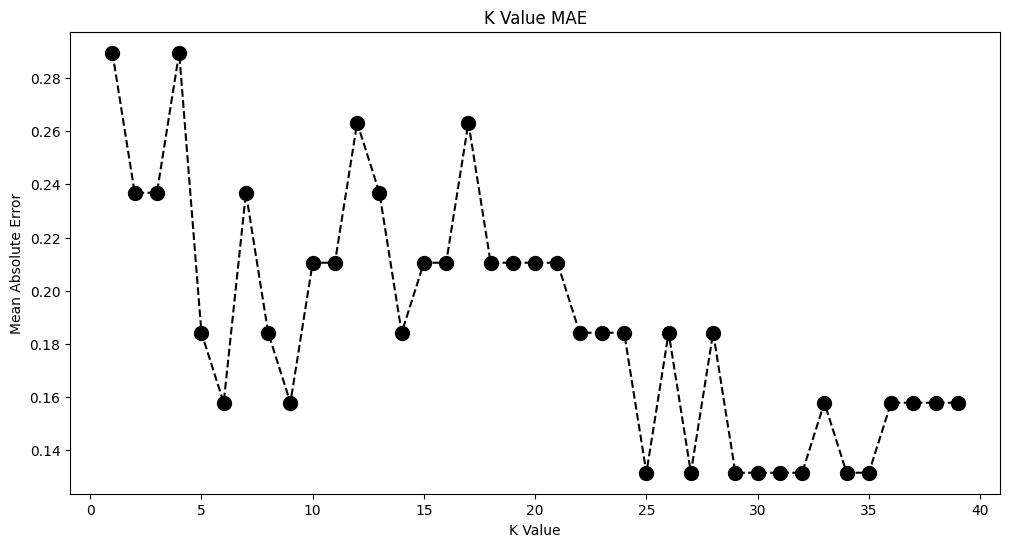

In [14]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')